# Final Project


I plan on looking through COVID-19 dataset and Stocks Data to see the correlation between them. I feel that stock price of some necessary items during pandemic would increase in my mind as they are needed more than ever before. For example, I assume the stock price of masks, toilet papers, and food manufacturers increased when compared to pre-COVID-19. When I looked at the COVID-19 Dataset, it contained a lot of data which contains all of the affected countries so I'll be sorting the dataset to only US. For stocks, I'll be looking at APT (Alpha Pro Tech, a mask making company), PG (Procter and Gamble, famous for consumer goods mostly with cleaning), and CPB (Campbell Soup Company).

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
sns.set()

In [2]:
covid = pd.read_csv('covid_19_clean_complete.csv')
covid.columns = map(str.lower, covid.columns) #making column headers lowercase
covid['date'] = pd.to_datetime(covid['date']) #Used datetime method since date was originally in ex) 1/22/20 format so to easily compare them with stocks date which is ex)2020-04-20
covid = covid.drop(columns=['province/state']) #Looked through the data and province/state didnt had any values for US
covid = covid[covid['country/region'].str.contains('US')] #Only looking at US Numbers in the COVID19 Data
covid['confirmed_dif_per_day'] = covid.confirmed.diff()
covid

,country/region,lat,long,date,confirmed,deaths,recovered,confirmed_dif_per_day
225,US,37.0902,-95.7129,2020-01-22,1,0,0,NaN
487,US,37.0902,-95.7129,2020-01-23,1,0,0,0.0
749,US,37.0902,-95.7129,2020-01-24,2,0,0,1.0
1011,US,37.0902,-95.7129,2020-01-25,2,0,0,0.0
1273,US,37.0902,-95.7129,2020-01-26,5,0,0,3.0
...,...,...,...,...,...,...,...,...
21185,US,37.0902,-95.7129,2020-04-11,526396,20463,31270,29861.0
21447,US,37.0902,-95.7129,2020-04-12,555313,22020,32988,28917.0
21709,US,37.0902,-95.7129,2020-04-13,580619,23529,43482,25306.0
21971,US,37.0902,-95.7129,2020-04-14,607670,25832,47763,27051.0


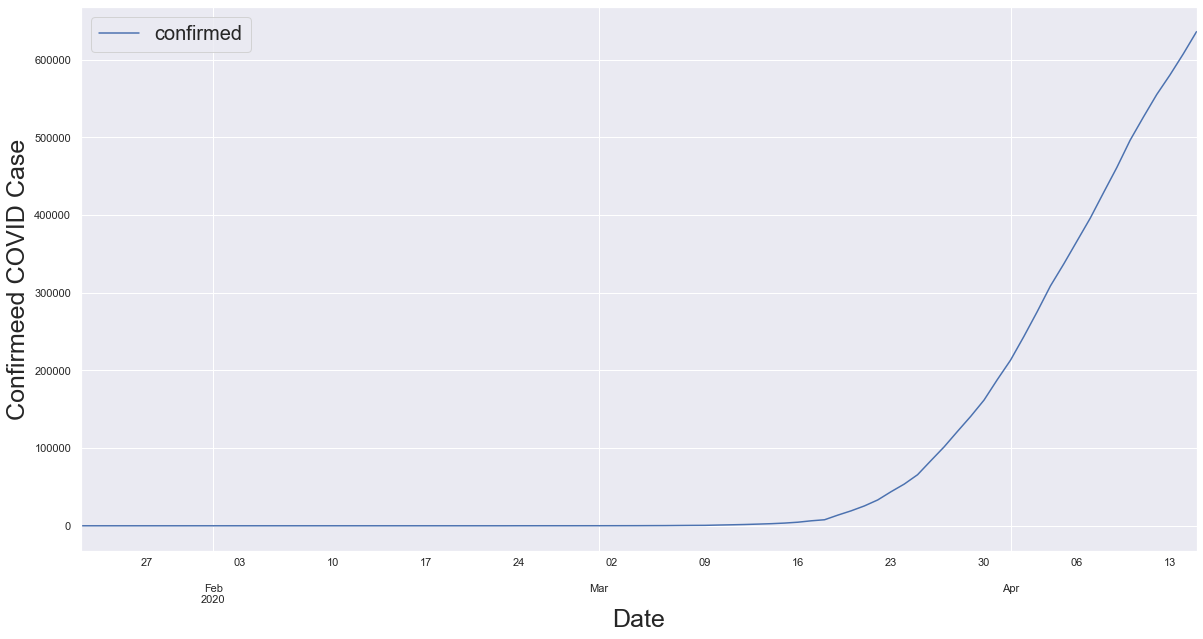

In [3]:
covid_us_overall = covid.plot.line(x='date', y='confirmed', figsize=(20,10))
plt.xlabel('Date', fontsize=25);
plt.ylabel('Confirmeed COVID Case', fontsize=25);
plt.legend(loc='best', prop={'size': 20});

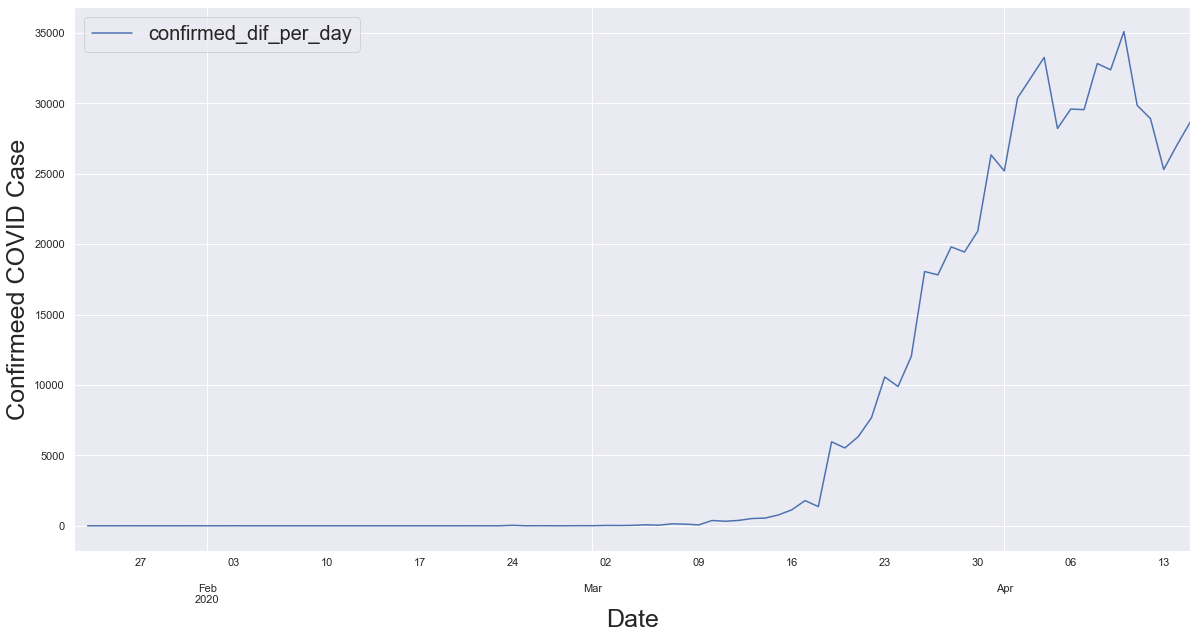

In [4]:
covid_us = covid.plot.line(x='date', y='confirmed_dif_per_day', figsize=(20,10))
plt.xlabel('Date', fontsize=25);
plt.ylabel('Confirmeed COVID Case', fontsize=25);
plt.legend(loc='best', prop={'size': 20});

In [5]:
#https://www.alphavantage.co/documentation/
#This Website just needs to request for an API, and when we have the API Key ready, gives stock data

In [21]:
#https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=APT&apikey=UQ49L6SGOKJD8QM5
#API and JSON format of APT stocks
#downloaded as CSV
apt = pd.read_csv('daily_APT.csv')
apt = apt.rename(columns={'timestamp': 'date'})
apt['date'] = pd.to_datetime(apt['date'])
apt['close_dif'] = apt.close.diff()
apt = apt.truncate(after=82)
apt

,date,open,high,low,close,volume,close_dif
0,2020-04-22,13.630,14.4000,12.72,13.0300,1668624,NaN
1,2020-04-21,13.450,14.5200,13.42,13.7500,2074956,0.7200
2,2020-04-20,13.700,14.3900,13.30,13.9200,3383524,0.1700
3,2020-04-17,13.410,13.9300,13.00,13.2800,2737014,-0.6400
4,2020-04-16,13.280,14.6400,13.05,14.4500,3669141,1.1700
...,...,...,...,...,...,...,...
78,2019-12-30,3.540,3.5400,3.43,3.5187,11625,0.0887
79,2019-12-27,3.480,3.5174,3.40,3.5100,7911,-0.0087
80,2019-12-26,3.480,3.5000,3.36,3.5000,16355,-0.0100
81,2019-12-24,3.545,3.5450,3.41,3.4500,14284,-0.0500


In [29]:
#https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=PG&apikey=UQ49L6SGOKJD8QM5
#API and JSON of PG stocks (toilet Paeper)
pg = pd.read_csv('daily_PG.csv')
pg = pg.rename(columns={'timestamp': 'date'})
pg['date'] = pd.to_datetime(apt['date'])
pg['close_dif'] = pg.close.diff()
pg = pg.truncate(after=82)
pg

,date,open,high,low,close,volume,close_dif
0,2020-04-22,119.99,120.2800,118.780,119.37,8055535,NaN
1,2020-04-21,119.50,120.3000,118.430,119.68,9368762,0.31
2,2020-04-20,121.47,123.2300,120.540,120.60,10827744,0.92
3,2020-04-17,122.45,124.9900,120.540,124.69,15897890,4.09
4,2020-04-16,122.35,122.5000,119.900,121.50,11975467,-3.19
...,...,...,...,...,...,...,...
78,2019-12-30,125.76,125.9800,124.140,124.47,3884343,-0.43
79,2019-12-27,125.56,126.2950,125.390,126.09,5192014,1.62
80,2019-12-26,125.10,125.7450,124.870,125.22,4760426,-0.87
81,2019-12-24,124.79,125.3099,124.580,125.22,2022053,0.00


In [33]:
#https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=CPB&apikey=UQ49L6SGOKJD8QM5
##API and JSON of CPB stocks (Campbell Soup Company)
cpb = pd.read_csv('daily_CPB.csv')
cpb = cpb.rename(columns={'timestamp': 'date'})
cpb['date'] = pd.to_datetime(cpb['date'])
cpb['close_dif'] = cpb.close.diff()
cpb = cpb.truncate(after=82)
cpb

,date,open,high,low,close,volume,close_dif
0,2020-04-22,50.41,50.990,49.980,50.83,747702,NaN
1,2020-04-21,51.40,51.800,49.600,50.44,1679561,-0.39
2,2020-04-20,50.58,52.460,50.000,51.30,2461105,0.86
3,2020-04-17,51.37,51.490,49.190,50.34,3683804,-0.96
4,2020-04-16,51.02,52.140,50.440,51.11,4352153,0.77
...,...,...,...,...,...,...,...
78,2019-12-30,49.31,49.540,49.080,49.25,1285423,-0.17
79,2019-12-27,49.12,49.485,49.000,49.46,831680,0.21
80,2019-12-26,49.24,49.350,48.905,49.02,1932106,-0.44
81,2019-12-24,49.19,49.400,49.030,49.23,420566,0.21


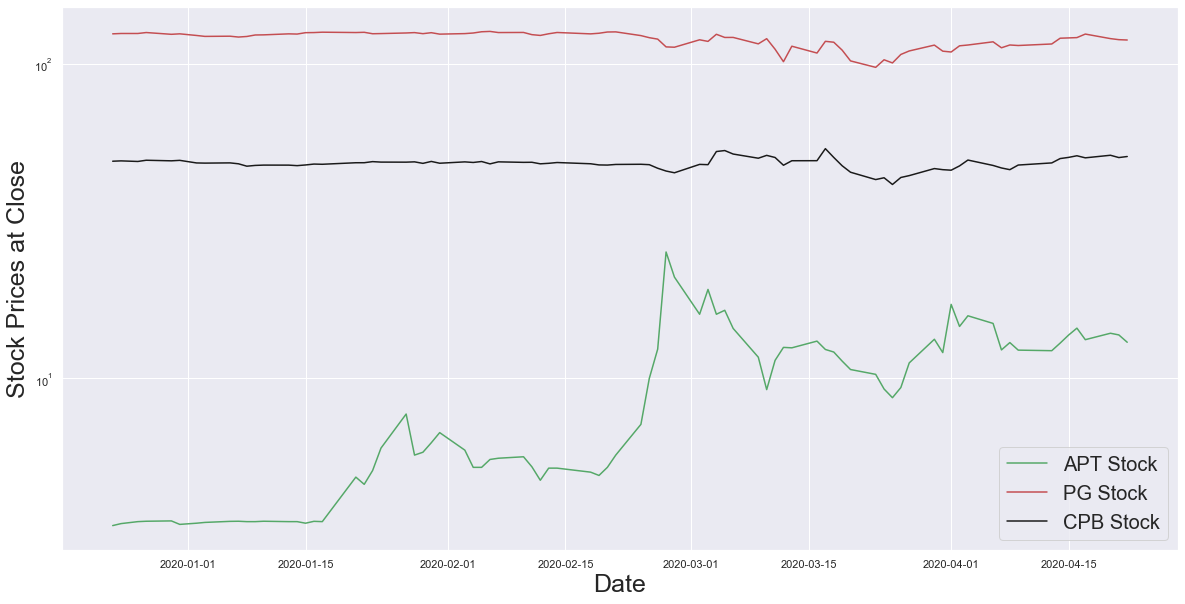

In [31]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_yscale('log')
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.plot(apt['date'], apt['close'], 'g-');
ax.plot(pg['date'], pg['close'], 'r-');
ax.plot(cpb['date'], cpb['close'], 'k-');
plt.xlabel('Date', fontsize=25);
plt.ylabel('Stock Prices at Close', fontsize=25);
plt.legend(loc='best', labels=['APT Stock','PG Stock', 'CPB Stock'], prop={'size': 20});

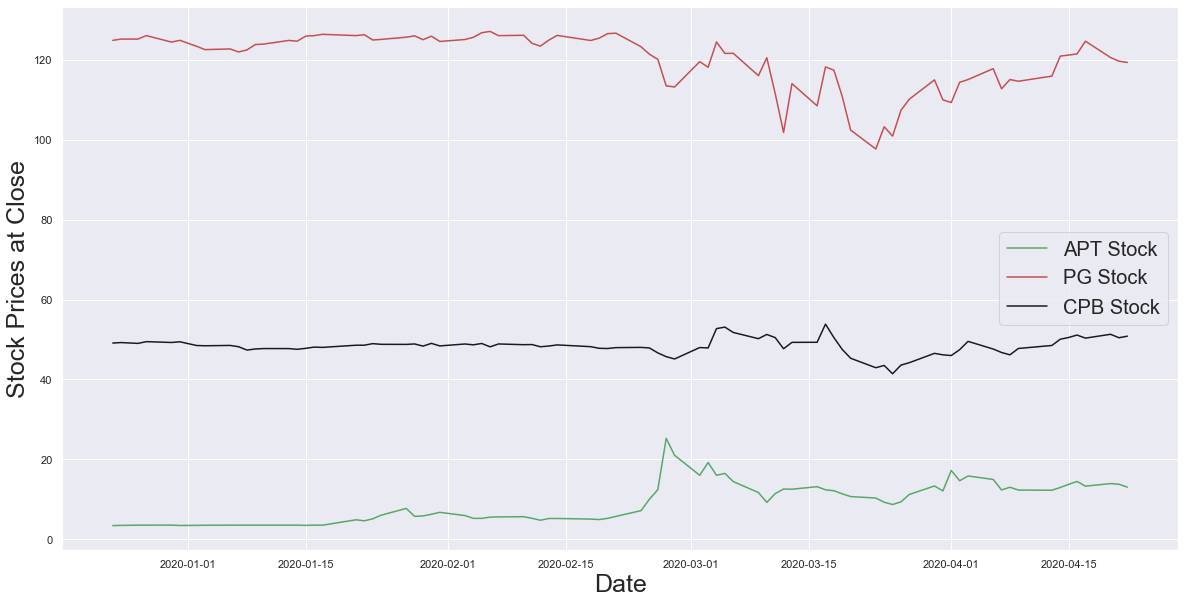

In [32]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(apt['date'], apt['close'], 'g-');
ax.plot(pg['date'], pg['close'], 'r-');
ax.plot(cpb['date'], cpb['close'], 'k-');
plt.xlabel('Date', fontsize=25);
plt.ylabel('Stock Prices at Close', fontsize=25);
plt.legend(loc='best', labels=['APT Stock','PG Stock', 'CPB Stock'], prop={'size': 20});